# Análise de Campeões de League of Legends

Este notebook realiza uma análise detalhada dos campeões em League of Legends com base em atributos como Base HP, Mana, dificuldade e custo (Blue Essence e RP). A análise visa explorar a relação entre esses atributos, a data de lançamento e as diferentes funções desempenhadas pelos campeões (Top, Jungle, Middle, Bottom e Support).

Objetivos principais:
- Analisar a distribuição de campeões por classe e função.
- Explorar a relação entre o custo e a dificuldade dos campeões.
- Identificar correlações entre atributos e o tempo de lançamento.


In [1]:
# Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel('/kaggle/input/league-of-legends-dataset/League of legend Champions 2024.xlsx')

## Conhecendo os Dados e Explorando

Os dados incluem informações detalhadas sobre cada campeão, como:
- `Name`: Nome do campeão.
- `Nick Name`: Apelido do campeão.
- `Classes`: A classe a que o campeão pertence (ex: Marksman, Assassin).
- `Release Date`: Data de lançamento do campeão.
- `Blue Essence` e `RP`: Custos do campeão em Blue Essence e Riot Points.
- `Base HP` e `Base Mana`: Atributos base do campeão.

Agora, buscaremos mais informações desses dados


In [3]:
df.head()

df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           168 non-null    object
 1   Nick Name      168 non-null    object
 2   Classes        168 non-null    object
 3   Release Date   168 non-null    object
 4   Last Changed   168 non-null    object
 5   Blue Essence   168 non-null    int64 
 6   RP             168 non-null    int64 
 7   Difficulty     168 non-null    object
 8   Role           168 non-null    object
 9   Range type     168 non-null    object
 10  Resourse type  168 non-null    object
 11  Base HP        168 non-null    int64 
 12  Base mana      168 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 17.2+ KB


,Name,Nick Name,Classes,Release Date,Last Changed,Blue Essence,RP,Difficulty,Role,Range type,Resourse type,Base HP,Base mana
163,Zeri,The spark of zaun,Marksman,2022-01-20 00:00:00,V14.18,4800,880,Intermediate_Plus,Bottom,Ranged,Mana,600,250
164,Ziggs,The hexplosives expert,Artillery,2012-02-01 00:00:00,V14.18,4800,880,Novice,"Bottom,Middle",Ranged,Mana,606,480
165,Zilean,The chronokeeper,Specialist,2009-04-18 00:00:00,V13.22,1350,585,Intermediate,Support,Ranged,Mana,574,452
166,Zoe,The aspect of twilight,Burst,2017-11-21 00:00:00,V14.9,4800,880,Expert,Middle,Ranged,Mana,630,425
167,Zyra,Rise of the thorns,Catcher,2012-07-24 00:00:00,V14.15,3150,790,Intermediate_Plus,Support,Ranged,Mana,574,418


In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           168 non-null    object        
 1   Nick Name      168 non-null    object        
 2   Classes        168 non-null    object        
 3   Release Date   168 non-null    datetime64[ns]
 4   Last Changed   168 non-null    object        
 5   Blue Essence   168 non-null    int64         
 6   RP             168 non-null    int64         
 7   Difficulty     168 non-null    object        
 8   Role           168 non-null    object        
 9   Range type     168 non-null    object        
 10  Resourse type  168 non-null    object        
 11  Base HP        168 non-null    int64         
 12  Base mana      168 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 17.2+ KB


In [5]:
# Verificando valores nulos

df.isnull().sum()

Name             0
Nick Name        0
Classes          0
Release Date     0
Last Changed     0
Blue Essence     0
RP               0
Difficulty       0
Role             0
Range type       0
Resourse type    0
Base HP          0
Base mana        0
dtype: int64

In [6]:
# Corrigindo o 'Resourse type' para 'Resource Type'
df.rename(columns={'Resourse type': 'Resource Type'}, inplace=True)
df.head()


,Name,Nick Name,Classes,Release Date,Last Changed,Blue Essence,RP,Difficulty,Role,Range type,Resource Type,Base HP,Base mana
0,Aatrox,The darkin blade,Juggernaut,2013-06-13,V14.14,4800,880,Advanced,Top,Melee,Blood Well,650,0
1,Ahri,The nine-tailed fox,Burst,2011-12-14,V14.18,3150,790,Intermediate,Middle,Ranged,Mana,590,418
2,Akali,The rogue assassin,Assassin,2010-05-11,V14.18,3150,790,Expert,"Top,Middle",Melee,Energy,600,200
3,Akshan,The rogue sentinel,Marksman Assassin,2021-07-22,V14.14,4800,880,Intermediate_Plus,Middle,Ranged,Mana,630,350
4,Alistar,The minotaur,Vanguard,2009-02-21,V14.16,1350,585,Novice,Support,Melee,Mana,685,350


### Contagens de classes, posições e dificuldade dos campeões


In [7]:
count_classes = df['Classes'].value_counts()
print(count_classes)

Classes
Marksman                21
Vanguard                15
Diver                   15
Juggernaut              14
Specialist              14
Assassin                13
Skirmisher              13
Battlemage              11
Burst                   11
Enchanter                8
Catcher                  7
Artillery                5
Warden                   5
Burst  Enchanter         2
Assassin  Diver          2
Mage  Assassin           1
Marksman  Catcher        1
Warden  Skirmisher       1
Marksman  Assassin       1
Burst  Artillery         1
Burst  Catcher           1
Assassin  Catcher        1
Marksman  Enchanter      1
Burst  Skirmisher        1
Enchanter  Warden        1
Marksman  Artillery      1
Assassin  Skirmisher     1
Name: count, dtype: int64


In [8]:
role_count = df['Role'].value_counts()
print(role_count)

Role
Top                          27
Jungle                       26
Middle                       22
Support                      21
Bottom                       17
Middle,Support                7
Top,Middle                    5
Top,Jungle                    5
Jungle,Top                    4
Bottom,Support                4
Jungle,Middle                 3
Top,Support                   3
Support,Middle                3
Bottom,Middle                 2
Middle,Jungle                 2
Jungle,Support                2
Middle,Top                    2
Bottom,Top                    1
Middle,Bottom,Top             1
Top,Middle,Bottom             1
Top,Jungle,Support            1
Middle,Support,Top            1
Bottom,Top,Middle             1
Top,Support,Jungle,Middle     1
Support,Jungle                1
Top,Middle,Support            1
Support,Top,Middle            1
Jungle,Top,Middle             1
Jungle,Support,Middle         1
Jungle,Top,Support            1
Name: count, dtype: int64


In [9]:
difficulty_count = df['Difficulty'].value_counts()

print(difficulty_count)

Difficulty
Novice               43
Intermediate         38
Beginner             29
Intermediate_Plus    28
Advanced             15
Expert               15
Name: count, dtype: int64


In [10]:
# Análise descritiva para atributos numéricos

df[['Base HP', 'Base mana', 'Blue Essence']].describe()

,Base HP,Base mana,Blue Essence
count,168.000000,168.000000,168.000000
mean,617.791667,314.547619,3156.755952
std,39.358608,122.340734,1733.155630
min,410.000000,0.000000,450.000000
25%,595.750000,280.000000,1350.000000
50%,625.000000,331.500000,3150.000000
75%,645.000000,400.000000,4800.000000
max,696.000000,530.000000,7800.000000


## EDA - Distribuição de Atributos


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


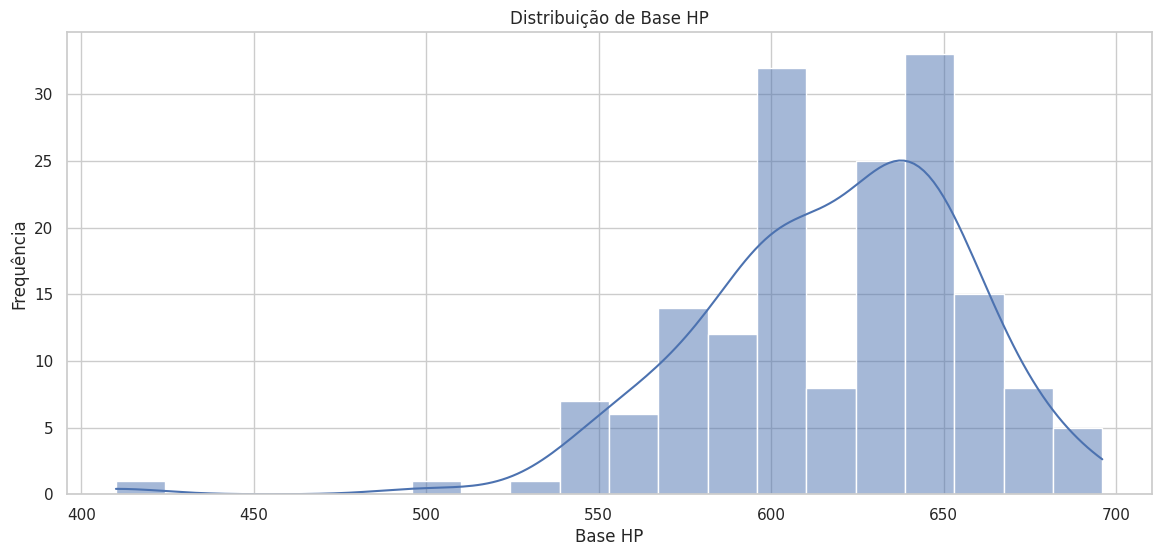

In [11]:
# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Histograma para Base HP
plt.figure(figsize=(14, 6))
sns.histplot(df['Base HP'], bins=20, kde=True)
plt.title('Distribuição de Base HP')
plt.xlabel('Base HP')
plt.ylabel('Frequência')
plt.show()

### Distribuição de Base HP

A maioria dos campeões tem uma Base HP entre 590 e 645, com alguns campeões se destacando por ter HP significativamente acima ou abaixo dessa faixa. Essa variação pode refletir as diferentes classes dos campeões, como Juggernauts, que geralmente têm HP mais alto.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


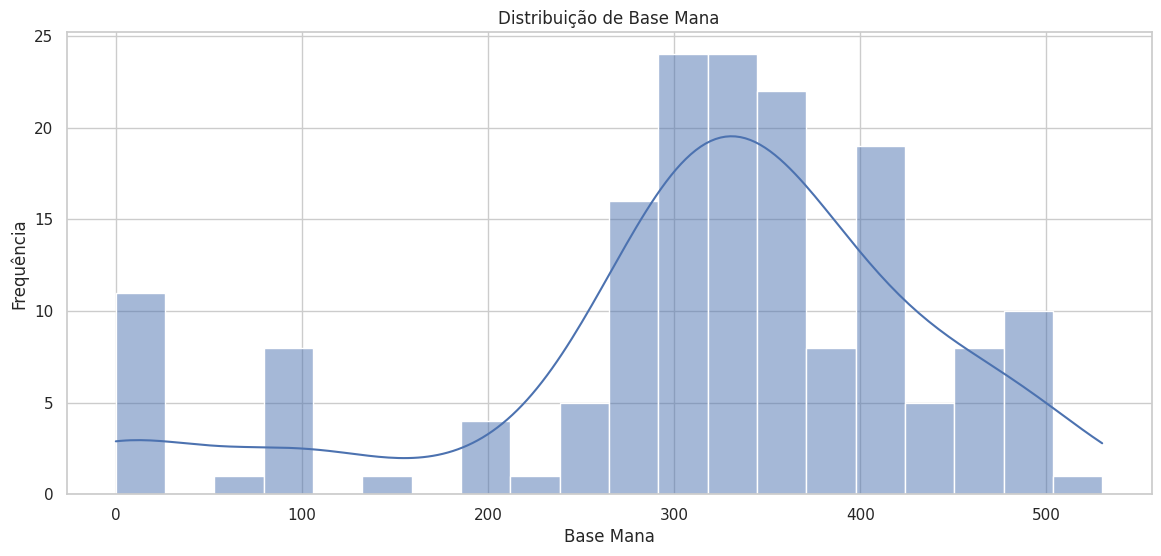

In [12]:
# Histograma para Base Mana
plt.figure(figsize=(14, 6))
sns.histplot(df['Base mana'], bins=20, kde=True)
plt.title('Distribuição de Base Mana')
plt.xlabel('Base Mana')
plt.ylabel('Frequência')
plt.show()

### Distribuição de Base da Mana

Campeões com **Mana** variam mais, com alguns campeões não usando Mana (valor 0) e outros com Mana muito alto. Isso geralmente depende da classe e estilo de jogo do campeão (ex: assassinos geralmente têm Mana menor, muitos nem possuindo essa característica).


In [13]:
# df['Classes'].info()
df['Classes'].unique()

array(['Juggernaut', 'Burst', 'Assassin', 'Marksman  Assassin',
       'Vanguard', 'Battlemage', 'Marksman', 'Mage  Assassin',
       'Specialist', 'Catcher', 'Skirmisher', 'Warden', 'Diver',
       'Assassin  Diver', 'Artillery', 'Enchanter', 'Marksman  Catcher',
       'Warden  Skirmisher', 'Burst  Enchanter', 'Burst  Artillery',
       'Burst  Catcher', 'Assassin  Catcher', 'Marksman  Enchanter',
       'Burst  Skirmisher', 'Enchanter  Warden', 'Marksman  Artillery',
       'Assassin  Skirmisher'], dtype=object)

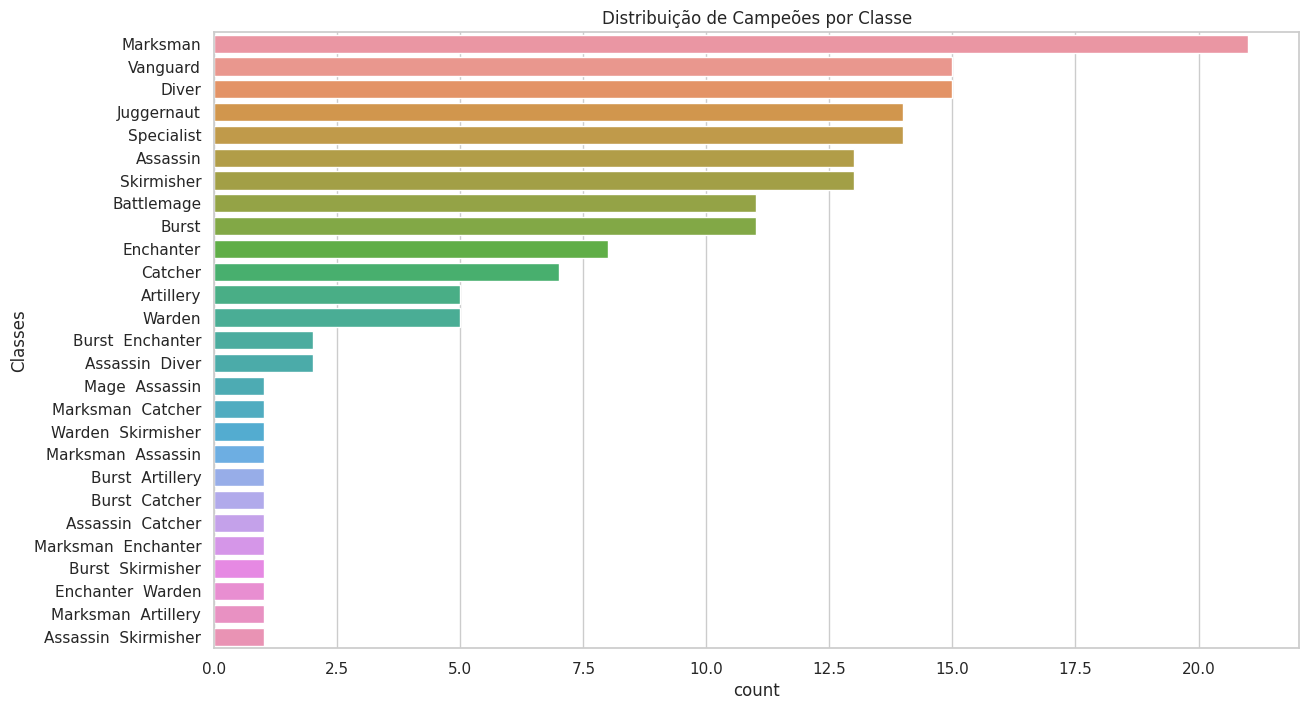

In [14]:
# Gráfico de barras para contagem de campeões por classe
plt.figure(figsize=(14, 8))
sns.countplot(y='Classes', data=df, order=df['Classes'].value_counts().index)
plt.title('Distribuição de Campeões por Classe')
plt.show()


### Distribuição de Campeões por Classe

A classe mais comum entre os campeões é **Marksman**, o que reflete o papel importante desses campeões em composições de equipe, especialmente no **Bottom**. Outras classes, como **Juggernaut** e **Assassin**, também são bem representadas, sugerindo a diversidade de campeões e estilos de jogos diferentes.


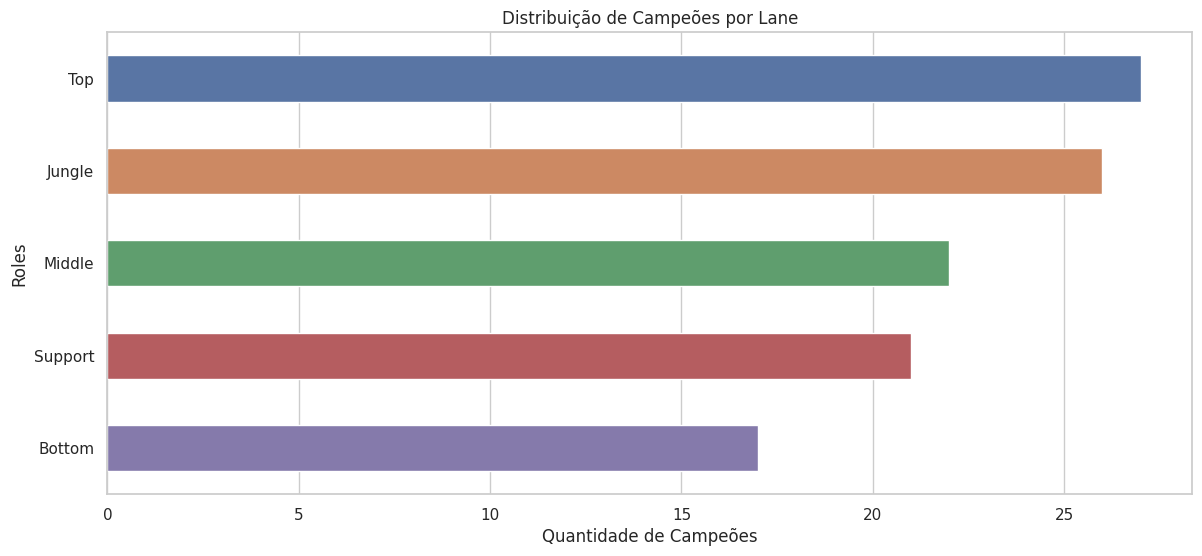

In [15]:
# Filtrar apenas as roles principais
roles_to_consider = ['Top', 'Jungle', 'Middle', 'Support', 'Bottom']
filtered_roles = df[df['Role'].isin(roles_to_consider)]

# Gráfico de barras para contagem de campeões por papel
plt.figure(figsize=(14, 6))
sns.countplot(y='Role', data=filtered_roles, order=filtered_roles['Role'].value_counts().index, width=0.5)
plt.title('Distribuição de Campeões por Lane')
plt.ylabel('Roles')
plt.xlabel('Quantidade de Campeões')
plt.show()


A distribuição de campeões por lanes fala por si só. A lane com mais variedade de campeões lançados é o TOP enquanto os ADC's (bottom) ficam com os menores índices.

## Desempenho dos Campeões por Atributos e Lanes


In [16]:
# Agrupando por Classes e Roles e calcular a média dos atributos
status_agrupado = df.groupby(['Classes', 'Role'])[['Base HP', 'Base mana']].mean().reset_index()

# Visualizar as estatísticas agrupadas
print(status_agrupado)


               Classes            Role     Base HP   Base mana
0            Artillery   Bottom,Middle  606.000000  480.000000
1            Artillery  Middle,Support  588.000000  440.000000
2            Artillery  Support,Middle  590.000000  469.000000
3            Artillery      Top,Middle  590.000000  375.000000
4             Assassin          Jungle  635.666667  296.666667
..                 ...             ...         ...         ...
76              Warden  Middle,Support  632.000000  500.000000
77              Warden         Support  610.000000  311.000000
78              Warden      Top,Jungle  610.000000  280.000000
79              Warden     Top,Support  625.000000  362.500000
80  Warden  Skirmisher          Bottom  640.000000  345.000000

[81 rows x 4 columns]


In [17]:
# Para a análise de correlação, vai ser necessário colunas numéricas

# Converter Difficulty para numérico

difficulty_mapping = {
    'Novice': 1,
    'Intermediate': 2,
    'Intermediate_Plus': 3,
    'Advanced': 4,
    'Expert': 5
}
df['Difficulty Level'] = df['Difficulty'].map(difficulty_mapping)

# Converter 'Release Date' para numérico
df['Release Timestamp'] = df['Release Date'].astype('int64') // 10**9

# Selecionar colunas relevantes para correlação
data_correlacao = df[['Difficulty Level', 'Base HP', 'Base mana', 'Release Timestamp']]

# Calcular a matriz de correlação
matriz_correlacao = data_correlacao.corr()

# Exibir a matriz de correlação
print(matriz_correlacao)


                   Difficulty Level   Base HP  Base mana  Release Timestamp
Difficulty Level           1.000000 -0.194914  -0.083710           0.132640
Base HP                   -0.194914  1.000000  -0.192757          -0.259707
Base mana                 -0.083710 -0.192757   1.000000           0.031319
Release Timestamp          0.132640 -0.259707   0.031319           1.000000


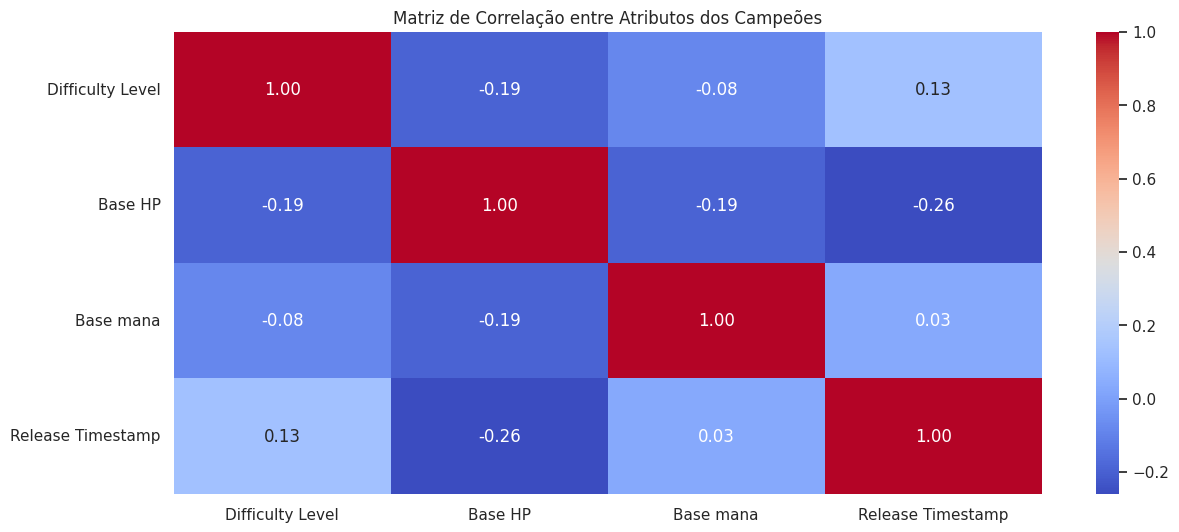

In [18]:
# Visualização da matriz de correlação

plt.figure(figsize=(14, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Atributos dos Campeões')
plt.show()


### Matriz de Correlação entre Atributos dos Campeões

Aqui, podemos observar algumas correlações interessantes:
- Uma correlação negativa moderada entre **Base HP** e a data de lançamento, o que indica que campeões mais recentes tendem a ter menos HP.
- A relação entre **Dificuldade** e **Base HP** é levemente negativa, sugerindo que campeões mais difíceis de jogar tendem a ter menos HP, refletindo a mecânica de alto risco e alta recompensa de campeões mais complexos.

**Porém**, vale mencionar que **não** são correlações fortes, o que indica o esforço da equipe de balanceamento do jogo em manter os campeões equilibrados.


In [19]:
df['Last Changed'].unique()

array(['V14.14', 'V14.18', 'V14.16', 'V14.9', 'V13.22', 'V14.4', 'V14.12',
       'V14.15', 'V14.13', 'V14.11', 'V13.16', 'V14.2', 'V14.8', 'V14.10',
       'V14.7', 'V13.19', 'V14.3', 'V14.5', 'V14.6'], dtype=object)

## Análises mais profundas sobre a correlação entre atributos (Dificuldade, Role, Base HP e/ou Mana).

In [20]:
# Matriz de sinergia de atributos (classes e role)

matriz_sinergia = filtered_roles.groupby(['Classes', 'Role']).size().unstack(fill_value=0)
print(matriz_sinergia)

Role                 Bottom  Jungle  Middle  Support  Top
Classes                                                  
Assassin                  0       3       4        0    1
Assassin  Catcher         0       0       0        1    0
Battlemage                0       0       7        0    0
Burst                     0       0       8        0    0
Burst  Enchanter          0       1       0        0    0
Catcher                   0       1       0        6    0
Diver                     0       8       0        0    2
Enchanter                 0       0       0        8    0
Juggernaut                1       1       0        0    9
Marksman                 11       0       1        0    3
Marksman  Artillery       1       0       0        0    0
Marksman  Assassin        0       0       1        0    0
Marksman  Catcher         1       0       0        0    0
Skirmisher                2       4       0        0    5
Specialist                0       5       1        1    5
Vanguard      

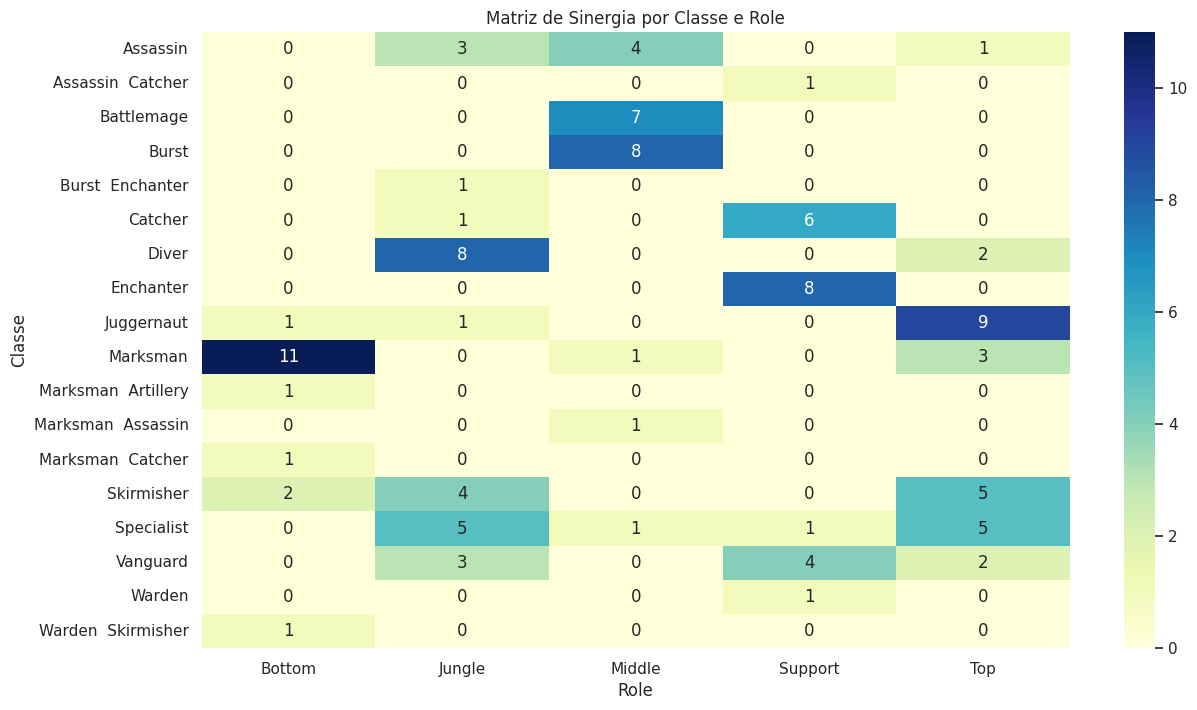

In [21]:
# Heatmap da matriz de sinergia 

plt.figure(figsize=(14, 8))
sns.heatmap(matriz_sinergia, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Sinergia por Classe e Role')
plt.xlabel('Role')
plt.ylabel('Classe')
plt.show()


### Heatmap da Matriz de Sinergia
O heatmap da matriz de sinergia destaca a distribuição dos campeões por classes e roles, sendo uma ferramenta útil para identificar sinergias em composições de equipe:
- **Classes como Marksman e Skirmisher** são mais predominantes em lanes como Bottom e Jungle, respectivamente.
- **Campeões especializados** em roles como Support tendem a ser Catchers e Enchanters, enfatizando seu papel de suporte ao time.

**Entretanto**, algumas combinações de classe e role são menos comuns, como Artillery em Support e Vanguard em Middle, sugerindo que essas combinações podem ser menos eficientes ou menos exploradas pelos jogadores.


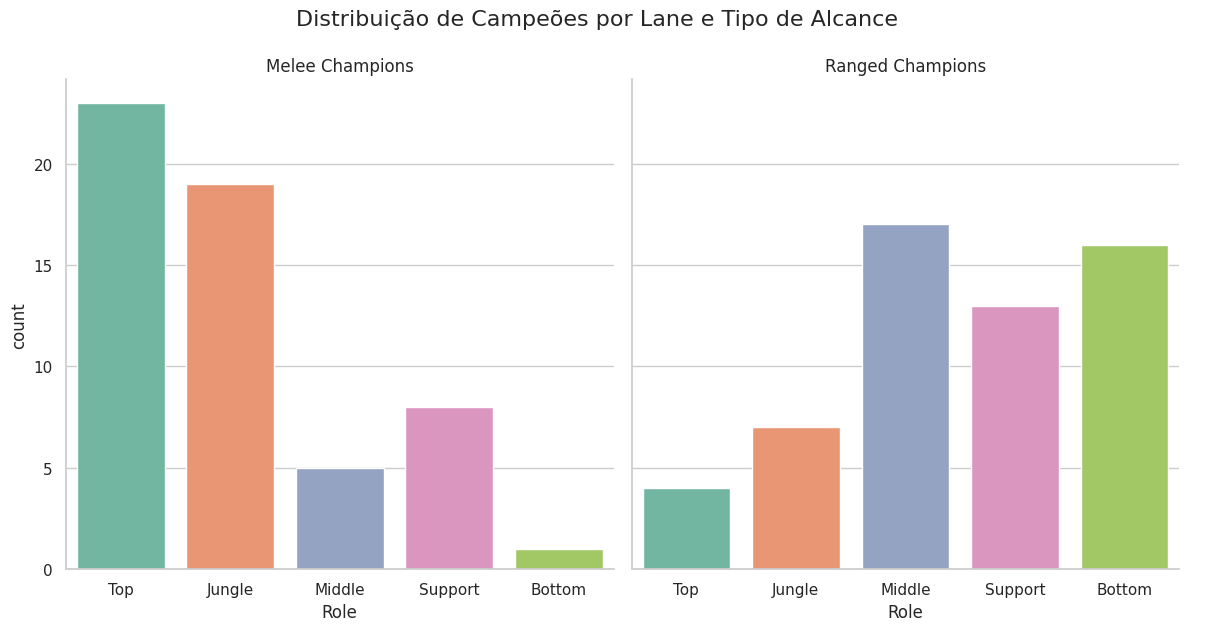

In [22]:
# Usar FacetGrid para visualizar campeões por Range Type
# Usei o 'filtered_roles' feito anteriormente para filtrar as Roles principais

g = sns.FacetGrid(df, col='Range type', height=6)
g.map(sns.countplot, 'Role', order=filtered_roles['Role'].value_counts().index, palette='Set2')
g.add_legend()
g.set_titles(col_template="{col_name} Champions")
g.fig.suptitle('Distribuição de Campeões por Lane e Tipo de Alcance', fontsize=16, y=1.05)
plt.show()


### Distribuições de Campeões por Lane e Tipo de Alcance
Aqui foi analisada a distribuição dos campeões por lane (Top, Jungle, Middle, Support e Bottom) e tipo de alcance (Melee ou Ranged):
- **A maioria dos campeões com alcance Ranged** se concentra nas lanes Bottom (ADC) e Middle (MID), como esperado em posições que requerem combate à distância.
- **Campeões de alcance Melee** são predominantes em Jungle e Top, onde o combate corpo a corpo é mais frequente.

Essa distribuição reflete o meta do jogo e a adequação dos campeões ao estilo de jogo de cada lane.


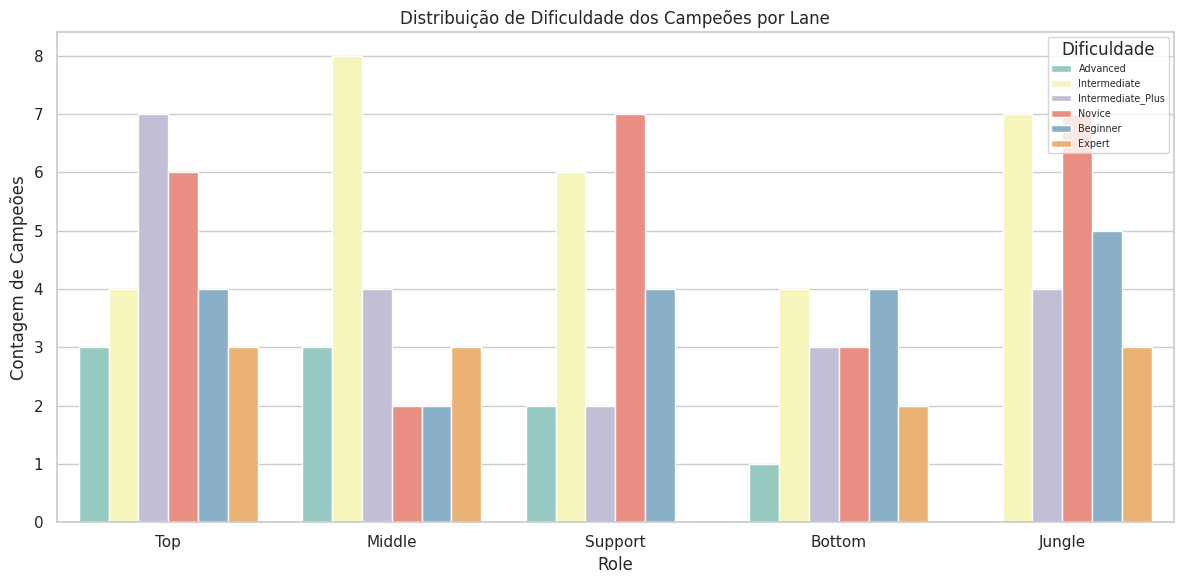

In [23]:
# Dificuldade de campeões por Role

# Gráfico de Dificuldade dos Campeões por Role
plt.figure(figsize=(12, 6))
sns.countplot(x='Role', hue='Difficulty', data=filtered_roles, palette='Set3')
plt.title('Distribuição de Dificuldade dos Campeões por Lane')
plt.xlabel('Role')
plt.ylabel('Contagem de Campeões')

plt.legend(title='Dificuldade', loc='upper right', fontsize='xx-small')  # Mude 'upper right' para outra posição se necessário

plt.tight_layout()
plt.show()

### Dificuldade de Campeões por Lane
A análise da dificuldade dos campeões por lane revelou:
- **TOP** e **MID** possuem a maior concentração de campeões classificados como Expert ou Advanced, indicando que essas lanes podem exigir mais habilidade e experiência do jogador.
- **Lanes como SUP e ADC** têm mais campeões classificados como Novice, tornando-as lanes mais acessíveis para jogadores iniciantes.

**Ainda assim**, a presença de campeões difíceis em todas as lanes sugere que a dificuldade também pode depender do estilo de jogo do jogador e não somente da lane escolhida.


## Correlação entre Custo e Data de Lançamento

In [24]:
# Diferença entre data de lançamento e hoje
df['Days Since Release'] = (datetime.datetime.now() - df['Release Date']).dt.days

# Calculando a correlação
correlation = df['Blue Essence'].corr(df['Days Since Release'])
print(f"Correlação entre Custo e Data de Lançamento: {correlation}")

Correlação entre Custo e Data de Lançamento: -0.5335654677116215


### Correlação entre Custo e Data de Lançamento

A correlação negativa de -0.5335 sugere que campeões lançados mais recentemente tendem a ser mais caros em **Blue Essence**. Isso pode ser atribuído à tendência da Riot Games de lançar campeões com preços mais altos para promover o uso de **Riot Points** nas primeiras semanas após o lançamento.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


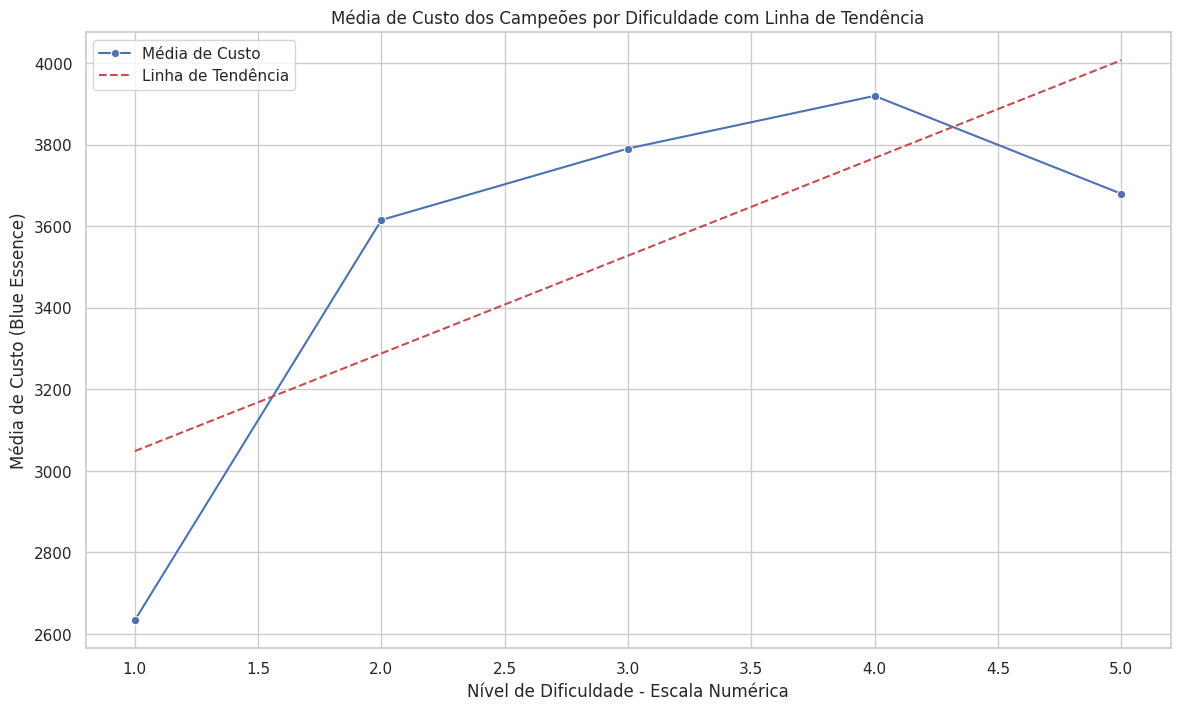

In [25]:
mean_cost_by_difficulty = df.groupby('Difficulty Level')['Blue Essence'].mean().reset_index()

# Gráfico de linha
plt.figure(figsize=(14,8))
sns.lineplot(x='Difficulty Level', y='Blue Essence', data=mean_cost_by_difficulty, marker='o', label='Média de Custo')

# Adicionando uma linha de tendência (usando numpy para calcular a regressão linear)
z = np.polyfit(mean_cost_by_difficulty['Difficulty Level'], mean_cost_by_difficulty['Blue Essence'], 1)
p = np.poly1d(z)

# Plotando a linha de tendência
plt.plot(mean_cost_by_difficulty['Difficulty Level'], p(mean_cost_by_difficulty['Difficulty Level']), "r--", label='Linha de Tendência')

# Configurações do gráfico
plt.xlabel('Nível de Dificuldade - Escala Numérica')
plt.ylabel('Média de Custo (Blue Essence)')
plt.title('Média de Custo dos Campeões por Dificuldade com Linha de Tendência')
plt.legend()

plt.show()

### Média de Dificuldade dos Custos dos Campeões com Linhas de Tendência
Aqui foi analisada a relação entre o custo dos campeões (Blue Essence) e seu nível de dificuldade:
- Existe uma **tendência de aumento no custo** dos campeões conforme a dificuldade aumenta, com campeões mais difíceis de jogar tendendo a custar **mais Blue Essence**.
- A linha de tendência reforça essa relação, mostrando que campeões com maior nível de dificuldade frequentemente exigem mais recursos para serem adquiridos.

**Porém**, há exceções a essa regra, com alguns campeões de dificuldade média apresentando custos elevados, o que pode estar relacionado ao tempo de lançamento ou popularidade.

## Campeões mais caros por tipo de role

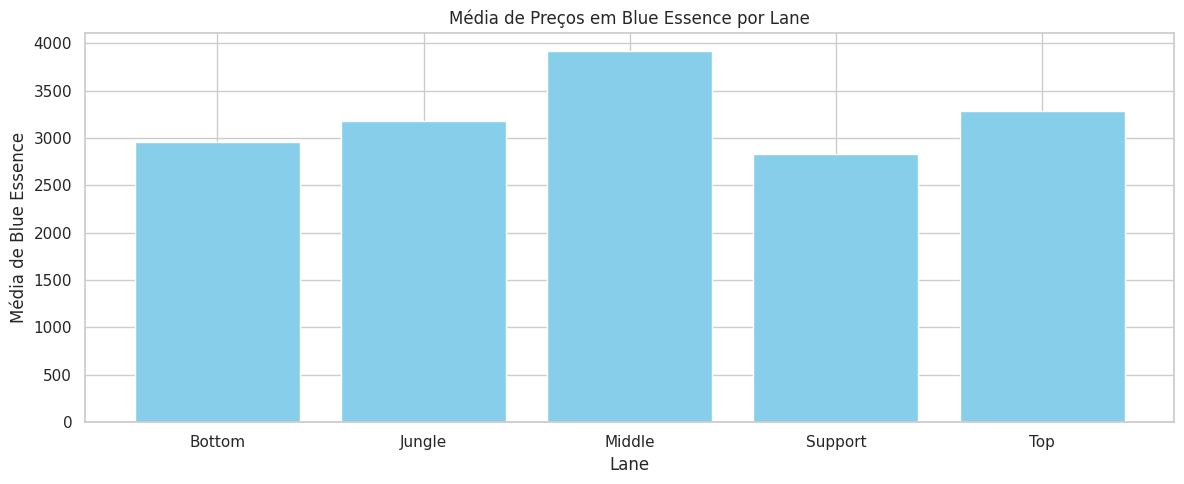

In [26]:
mean_prices = filtered_roles.groupby('Role')['Blue Essence'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.bar(mean_prices['Role'], mean_prices['Blue Essence'], color='skyblue')
plt.title('Média de Preços em Blue Essence por Lane')
plt.xlabel('Lane')
plt.ylabel('Média de Blue Essence')
plt.tight_layout()
plt.show()

### Campeões mais caros lançados antes de 2018

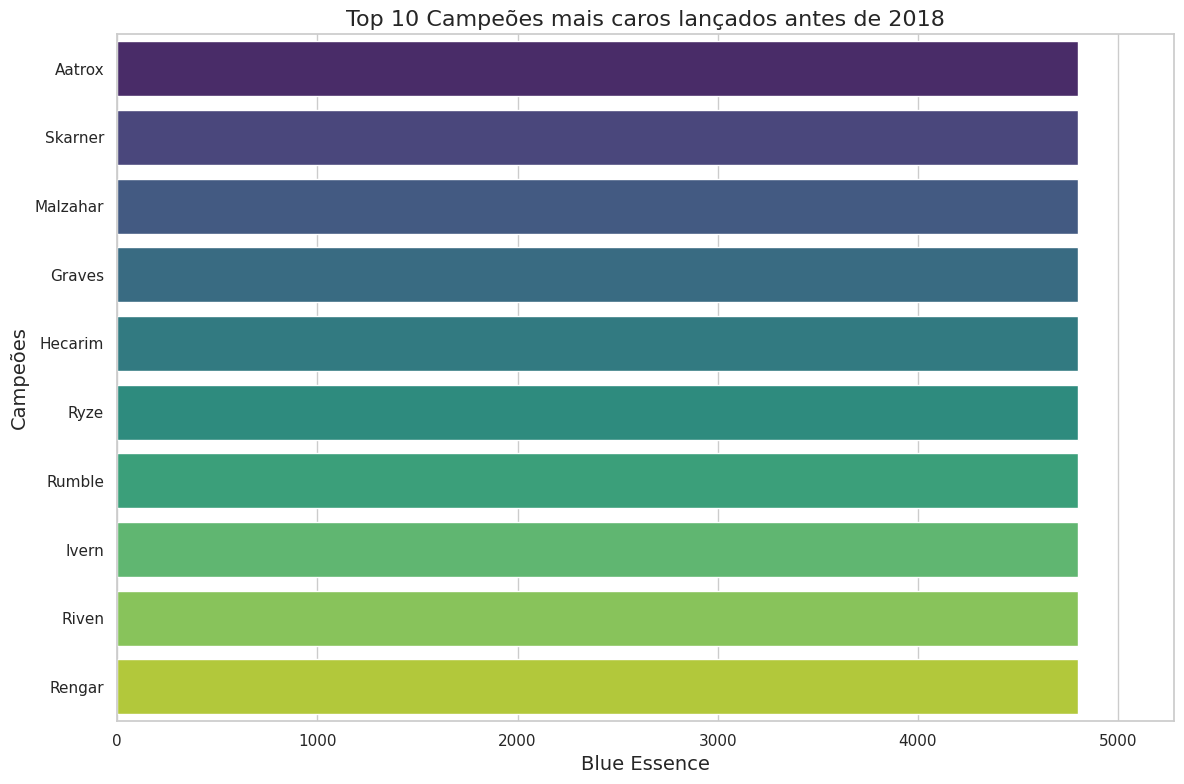

In [27]:
old_expensive_champions = df[df['Release Date'] < '2018-01-01'].sort_values(by='Blue Essence', ascending=False).head(10)

# Criando o gráfico de barras horizontal com cores personalizadas
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Blue Essence', y='Name', data=old_expensive_champions, palette='viridis')

plt.title('Top 10 Campeões mais caros lançados antes de 2018', fontsize=16)
plt.xlabel('Blue Essence', fontsize=14)
plt.ylabel('Campeões', fontsize=14)
plt.xlim(0, max(old_expensive_champions['Blue Essence']) * 1.1) 
plt.tight_layout()
plt.show()

## Conclusão

🔍 **Principais Descobertas**:

- **Classe em Alta**: A classe **Marksman** se destaca como a mais comum, especialmente na **botlane**. Juggernauts e Assassins também têm uma presença significativa, revelando a diversidade de estilos de jogo.

- **Distribuição por Lane**: A lane **Top** é a mais variada em termos de campeões, enquanto o **Bot** se concentra mais nos Atiradores. Essa diversidade oferece várias estratégias para os jogadores.

- **Correlação de Atributos**: Notamos uma correlação negativa entre **Base HP** e a data de lançamento. Campeões mais novos tendem a ter menos HP, possivelmente para manter o equilíbrio no jogo. Campeões mais difíceis também apresentam HP mais baixo, o que sugere um alto risco e alta recompensa nas mecânicas de jogo.

- **Matriz de Sinergia**: O heatmap revela que **Marksman** e **Skirmisher** são predominantes na **Botlane** e **Jungle**, enquanto **Support** geralmente tem campeões como **Catchers** e **Enchanters**. Sinergias são fundamentais para composições de equipe!

- **Dificuldade por Lane**: **Top** e **Mid** possuem a maior concentração de campeões classificados como **Expert** ou **Advanced**. Lanes como **Support** e **ADC** são mais acessíveis, tornando-as ideais para iniciantes.

- **Estratégia de Monetização**: A correlação negativa entre **Custo** e **Data de Lançamento** mostra que campeões mais novos custam mais em **Blue Essence**. Isso indica uma estratégia da Riot Games para promover o uso de **Riot Points**.

- **Custo vs. Dificuldade**: Em geral, campeões mais difíceis custam mais, mas algumas exceções existem. Isso pode estar ligado à popularidade ou tempo de lançamento.

🎮 **Resumo**: Esta análise revela a complexidade e o equilíbrio em League of Legends, oferecendo insights valiosos para jogadores e desenvolvedores. A diversidade de campeões e o balanceamento entre custo e dificuldade garantem uma experiência rica e dinâmica!

